In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scorecardpy as sc
import pprint

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
#You can see that there is an outlier here 
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df['person_age'].sort_values(ascending=False).head(10)

81       144
32297    144
183      144
747      123
575      123
32416     94
32506     84
32422     80
32355     78
32534     76
Name: person_age, dtype: int64

In [7]:
df['person_emp_length'].sort_values(ascending=False).head(10)

0        123.0
210      123.0
32355     41.0
32515     38.0
32428     34.0
31866     31.0
32263     31.0
31867     31.0
30914     31.0
32562     30.0
Name: person_emp_length, dtype: float64

In [8]:
#Removing values that do not make sense as you cannot live past 100 highly unlikely
df.drop(df.loc[df['person_emp_length'] == 123].index, inplace=True)
df.drop(df.loc[df['person_age'] >= 123].index, inplace=True)

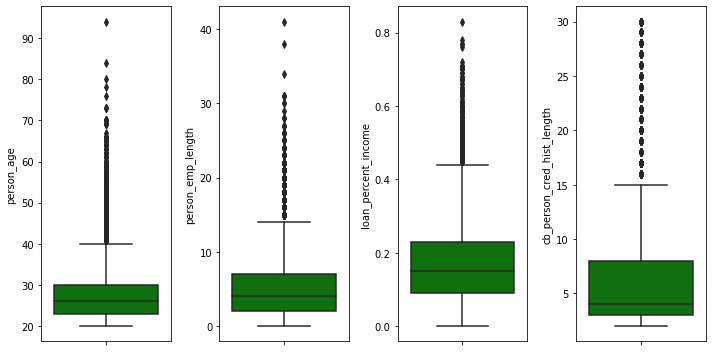

In [9]:
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length']
plt.figure(figsize=(10,5))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[features[i]], color='Green', orient='v')
    plt.tight_layout()

In [10]:
#Filling the na values with the mean values
mean_person_emp_length = df['person_emp_length'].mean()
mean_loan_int_rate = df['loan_int_rate'].mean()
print(f'Mean variable person_emp_length, {mean_person_emp_length} and loan_int_rate, {mean_loan_int_rate}.')

Mean variable person_emp_length, 4.782063827772341 and loan_int_rate, 11.011528565123772.


In [11]:
df['person_emp_length'] = df['person_emp_length'].fillna(mean_person_emp_length) 
df['person_emp_length'].isna().sum()

0

In [12]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_loan_int_rate) 
df['loan_int_rate'].isna().sum()

0

<AxesSubplot:>

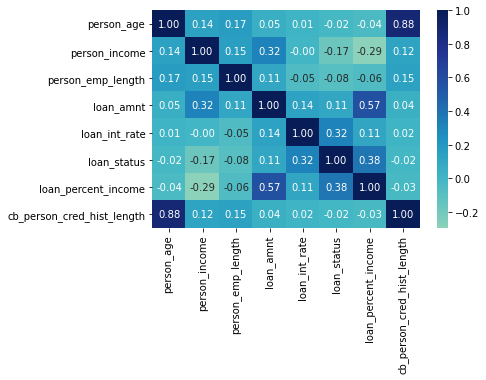

In [13]:
sns.heatmap(df.corr(), center=0, annot=True, fmt='.2f', cmap='YlGnBu')

In [14]:
df.drop(['person_age'], axis=1, inplace=True)
df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [15]:
owners = df.loc[(df['person_home_ownership'] == 'OWN') | (df['person_home_ownership'] == 'MORTGAGE')]
owners.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
5,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
11,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2


In [16]:
owners.isnull().sum()

person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

<AxesSubplot:xlabel='loan_int_rate', ylabel='Density'>

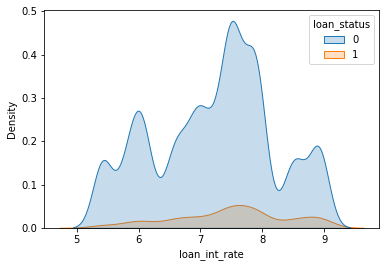

In [17]:
df_filter = df[(df['loan_int_rate'] < 9)]
sns.kdeplot(data = df_filter, x="loan_int_rate", hue="loan_status", fill = True)

[INFO] creating woe binning ...


{'cb_person_cred_hist_length': <Figure size 432x288 with 2 Axes>,
 'person_income': <Figure size 432x288 with 2 Axes>,
 'loan_intent': <Figure size 432x288 with 2 Axes>,
 'person_emp_length': <Figure size 432x288 with 2 Axes>,
 'loan_int_rate': <Figure size 432x288 with 2 Axes>,
 'loan_percent_income': <Figure size 432x288 with 2 Axes>,
 'loan_grade': <Figure size 432x288 with 2 Axes>,
 'person_home_ownership': <Figure size 432x288 with 2 Axes>,
 'cb_person_default_on_file': <Figure size 432x288 with 2 Axes>,
 'loan_amnt': <Figure size 432x288 with 2 Axes>}

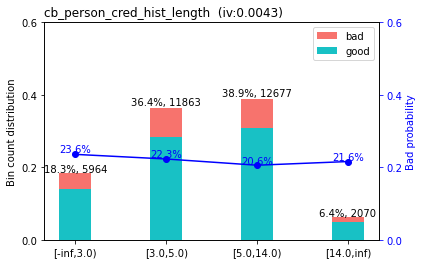

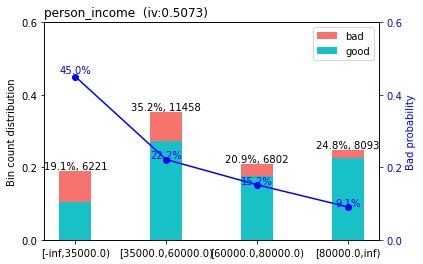

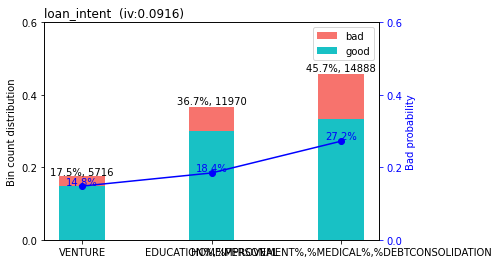

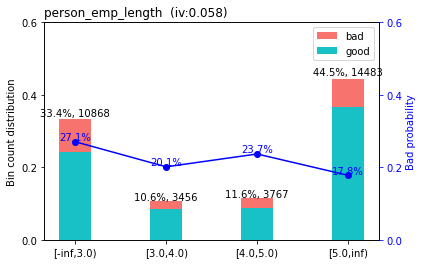

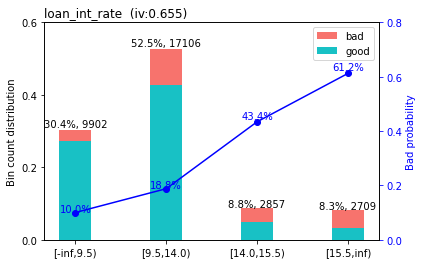

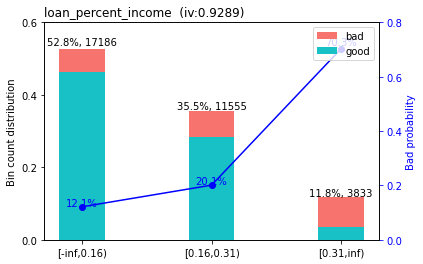

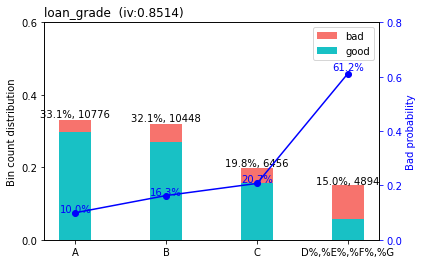

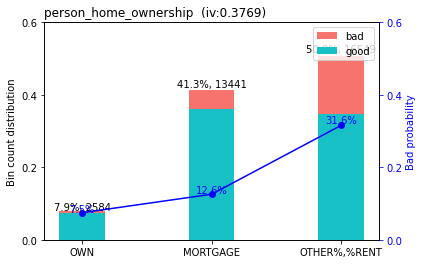

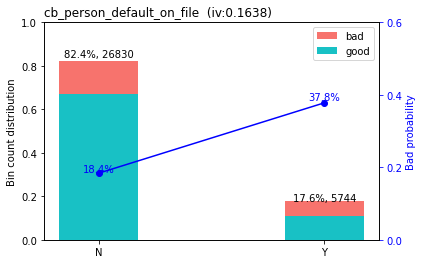

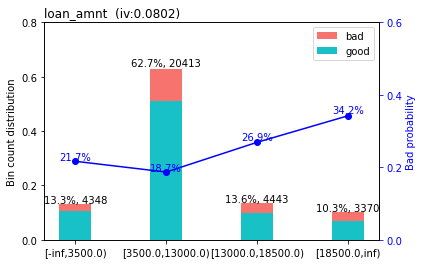

In [18]:
bins = sc.woebin(df, y='loan_status')
sc.woebin_plot(bins)

In [19]:
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

cb_person_cred_hist_length  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cb_person_cred_hist_length,"[-inf,3.0)",5964,0.183091,4558,1406,0.235748,0.100168,0.001889,0.004276,3.0,False
1,cb_person_cred_hist_length,"[3.0,5.0)",11863,0.364186,9218,2645,0.222962,0.027816,0.000284,0.004276,5.0,False
2,cb_person_cred_hist_length,"[5.0,14.0)",12677,0.389175,10068,2609,0.205806,-0.074092,0.002092,0.004276,14.0,False
3,cb_person_cred_hist_length,"[14.0,inf)",2070,0.063548,1623,447,0.215942,-0.013170,0.000011,0.004276,inf,False


----------------------------------------------------------------------------------------------------
person_income  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,person_income,"[-inf,35000.0)",6221,0.190981,3419,2802,0.450410,1.077289,0.280103,0.507301,35000.0,False
1,person_income,"[35000.0,60000.0)",11458,0.351753,8920,2538,0.221505,0.019384,0.000133,0.507301,60000.0,False
2,person_income,"[60000.0,80000.0)",6802,0.208817,5769,1033,0.151867,-0.443728,0.036021,0.507301,80000.0,False
3,person_income,"[80000.0,inf)",8093,0.248450,7359,734,0.090696,-1.028867,0.191044,0.507301,inf,False


----------------------------------------------------------------------------------------------------
loan_intent  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_intent,VENTURE,5716,0.175477,4869,847,0.148181,-0.472640,0.034035,0.091628,VENTURE,False
1,loan_intent,"EDUCATION%,%PERSONAL",11970,0.367471,9762,2208,0.184461,-0.210107,0.015262,0.091628,"EDUCATION%,%PERSONAL",False
2,loan_intent,"HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION",14888,0.457052,10836,4052,0.272166,0.292640,0.042330,0.091628,"HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION",False


----------------------------------------------------------------------------------------------------
person_emp_length  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,person_emp_length,"[-inf,3.0)",10868,0.333640,7928,2940,0.270519,0.284312,0.029106,0.057969,3.0,False
1,person_emp_length,"[3.0,4.0)",3456,0.106097,2760,696,0.201389,-0.101333,0.001058,0.057969,4.0,False
2,person_emp_length,"[4.0,5.0)",3767,0.115644,2875,892,0.236793,0.105961,0.001337,0.057969,5.0,False
3,person_emp_length,"[5.0,inf)",14483,0.444618,11904,2579,0.178071,-0.253169,0.026468,0.057969,inf,False


----------------------------------------------------------------------------------------------------
loan_int_rate  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_int_rate,"[-inf,9.5)",9902,0.303985,8909,993,0.100283,-0.917783,0.192830,0.654977,9.5,False
1,loan_int_rate,"[9.5,14.0)",17106,0.525143,13890,3216,0.188004,-0.186728,0.017347,0.654977,14.0,False
2,loan_int_rate,"[14.0,15.5)",2857,0.087708,1617,1240,0.434022,1.010842,0.112185,0.654977,15.5,False
3,loan_int_rate,"[15.5,inf)",2709,0.083164,1051,1658,0.612034,1.732173,0.332615,0.654977,inf,False


----------------------------------------------------------------------------------------------------
loan_percent_income  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_percent_income,"[-inf,0.16)",17186,0.527599,15098,2088,0.121494,-0.702052,0.209949,0.928945,0.16,False
1,loan_percent_income,"[0.16,0.31)",11555,0.354731,9231,2324,0.201125,-0.102974,0.003652,0.928945,0.31,False
2,loan_percent_income,"[0.31,inf)",3833,0.117671,1138,2695,0.703105,2.138429,0.715344,0.928945,inf,False


----------------------------------------------------------------------------------------------------
loan_grade  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_grade,A,10776,0.330816,9703,1073,0.099573,-0.925673,0.212928,0.851446,A,False
1,loan_grade,B,10448,0.320747,8747,1701,0.162806,-0.361191,0.037608,0.851446,B,False
2,loan_grade,C,6456,0.198195,5117,1339,0.207404,-0.064342,0.000806,0.851446,C,False
3,loan_grade,"D%,%E%,%F%,%G",4894,0.150243,1900,2994,0.611770,1.731060,0.600104,0.851446,"D%,%E%,%F%,%G",False


----------------------------------------------------------------------------------------------------
person_home_ownership  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,person_home_ownership,OWN,2584,0.079327,2391,193,0.074690,-1.240473,0.082777,0.37694,OWN,False
1,person_home_ownership,MORTGAGE,13441,0.412630,11751,1690,0.125735,-0.662907,0.148244,0.37694,MORTGAGE,False
2,person_home_ownership,"OTHER%,%RENT",16549,0.508043,11325,5224,0.315669,0.502554,0.145920,0.37694,"OTHER%,%RENT",False


----------------------------------------------------------------------------------------------------
cb_person_default_on_file  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cb_person_default_on_file,N,26830,0.823663,21894,4936,0.183973,-0.213354,0.035241,0.16376,N,False
1,cb_person_default_on_file,Y,5744,0.176337,3573,2171,0.377960,0.778086,0.128520,0.16376,Y,False


----------------------------------------------------------------------------------------------------
loan_amnt  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_amnt,"[-inf,3500.0)",4348,0.133481,3406,942,0.216651,-0.008985,0.000011,0.080197,3500.0,False
1,loan_amnt,"[3500.0,13000.0)",20413,0.626665,16596,3817,0.186989,-0.193394,0.022161,0.080197,13000.0,False
2,loan_amnt,"[13000.0,18500.0)",4443,0.136397,3248,1195,0.268962,0.276410,0.011224,0.080197,18500.0,False
3,loan_amnt,"[18500.0,inf)",3370,0.103457,2217,1153,0.342136,0.622516,0.046801,0.080197,inf,False


----------------------------------------------------------------------------------------------------


In [20]:
df.drop(['cb_person_cred_hist_length'], axis=1, inplace=True)

[INFO] creating woe binning ...


{'person_income': <Figure size 432x288 with 2 Axes>,
 'loan_intent': <Figure size 432x288 with 2 Axes>,
 'person_emp_length': <Figure size 432x288 with 2 Axes>,
 'loan_int_rate': <Figure size 432x288 with 2 Axes>,
 'loan_percent_income': <Figure size 432x288 with 2 Axes>,
 'loan_grade': <Figure size 432x288 with 2 Axes>,
 'person_home_ownership': <Figure size 432x288 with 2 Axes>,
 'cb_person_default_on_file': <Figure size 432x288 with 2 Axes>,
 'loan_amnt': <Figure size 432x288 with 2 Axes>}

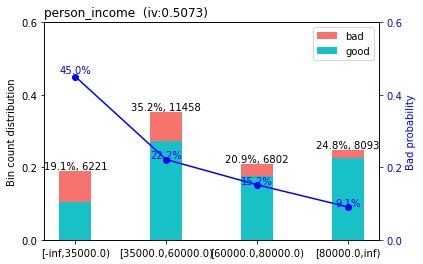

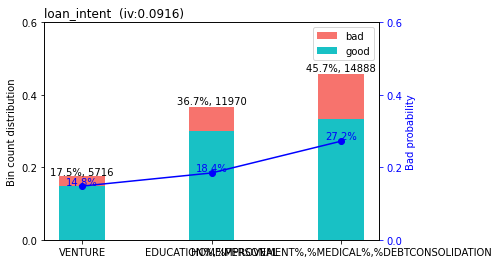

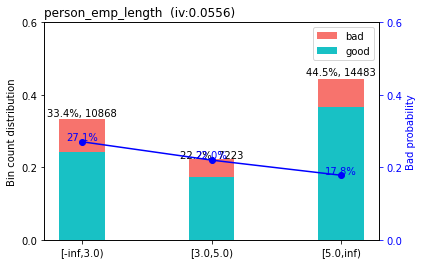

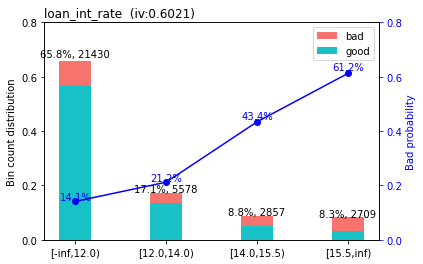

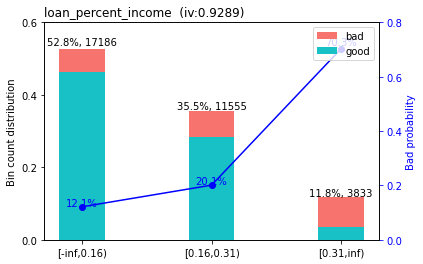

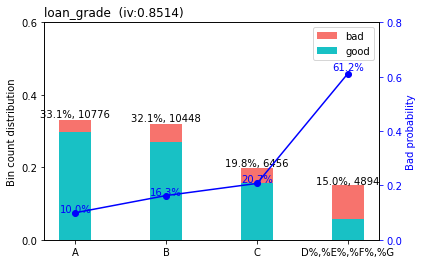

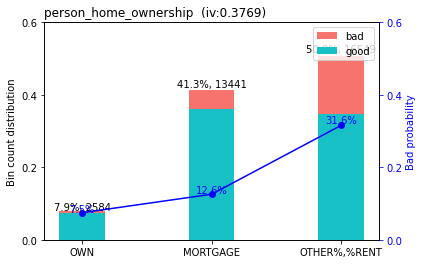

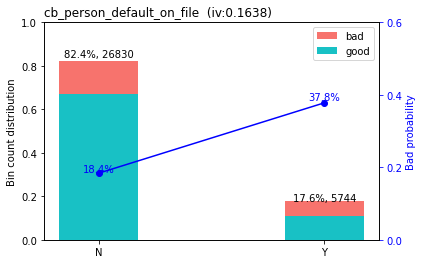

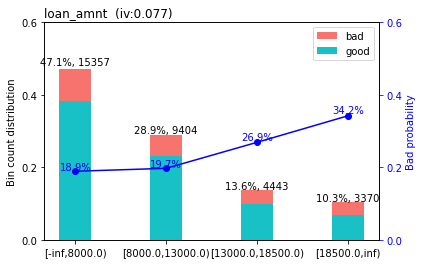

In [21]:
breaks_adj = {'loan_amnt' : [8000, 13000, 18500], 'loan_int_rate' : [12,14,15.5], 'person_emp_length' : [3,5]}
bins = sc.woebin(df, y='loan_status',breaks_list=breaks_adj)
sc.woebin_plot(bins)

This is the entire population vs loan status

In [22]:
train, test = sc.split_df(df, 'loan_status', ratio=0.7).values()
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
y_train = train_woe.loc[:,'loan_status']
X_train = train_woe.loc[:,train_woe.columns != 'loan_status']
y_test = test_woe.loc[:,'loan_status']
X_test = test_woe.loc[:,train_woe.columns != 'loan_status']
lr = LogisticRegression()
lr.fit(X_train, y_train)
card = sc.scorecard(bins, lr, X_train.columns)
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)
pprint.pprint(card)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
{'basepoints':      variable  bin  points
0  basepoints  NaN   487.0,
 'cb_person_default_on_file':                      variable bin  points
24  cb_person_default_on_file   N    -1.0
25  cb_person_default_on_file   Y     4.0,
 'loan_amnt':      variable                bin  points
26  loan_amnt      [-inf,8000.0)     2.0
27  loan_amnt   [8000.0,13000.0)     1.0
28  loan_amnt  [13000.0,18500.0)    -3.0
29  loan_amnt      [18500.0,inf)    -6.0,
 'loan_grade':       variable            bin  points
17  loan_grade              A    77.0
18  loan_grade              B    30.0
19  loan_grade              C     5.0
20  loan_grade  D%,%E%,%F%,%G  -143.0,
 'loan_int_rate':          variable          bin  points
10  loan_int_rate  [-inf,12.0)     7.0
11  loan_int_rate  [12.0,14.0)     0.0
12  loan_int_rate  [14.0,15.5)   -14.0
13  loan_int_rate   [15.5,inf)   -24.0,
 'loan_intent':       variable                           

In [23]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # lower rmse indicates better fit -> more accurately predicts response
r2 = r2_score(y_test, y_pred) # higher r2 indicates better fit (proportion of variance explained by model)
print(rmse, r2)

0.35936679656585885 0.2428842961405855


C:\Users\zweid\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\zweid\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


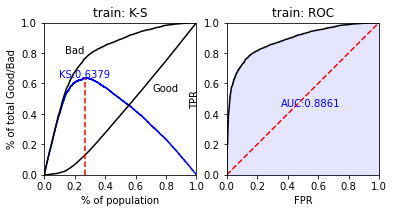

C:\Users\zweid\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\zweid\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


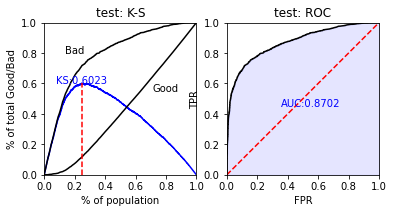

In [24]:
# Evaluate the performance of the Logistic Regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [25]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8146
           1       0.59      0.77      0.66      1626

    accuracy                           0.87      9772
   macro avg       0.77      0.83      0.79      9772
weighted avg       0.89      0.87      0.88      9772

[[7262  884]
 [ 378 1248]]


In [26]:
card1 = sc.scorecard(bins, lr, X_train.columns, basepoints_eq0= 0, points0 = 600, odds0 = 1/50 , pdo = 20 )
pprint.pprint(card1)

{'basepoints':      variable  bin  points
0  basepoints  NaN   527.0,
 'cb_person_default_on_file':                      variable bin  points
24  cb_person_default_on_file   N    -0.0
25  cb_person_default_on_file   Y     1.0,
 'loan_amnt':      variable                bin  points
26  loan_amnt      [-inf,8000.0)     1.0
27  loan_amnt   [8000.0,13000.0)     0.0
28  loan_amnt  [13000.0,18500.0)    -1.0
29  loan_amnt      [18500.0,inf)    -2.0,
 'loan_grade':       variable            bin  points
17  loan_grade              A    31.0
18  loan_grade              B    12.0
19  loan_grade              C     2.0
20  loan_grade  D%,%E%,%F%,%G   -57.0,
 'loan_int_rate':          variable          bin  points
10  loan_int_rate  [-inf,12.0)     3.0
11  loan_int_rate  [12.0,14.0)     0.0
12  loan_int_rate  [14.0,15.5)    -6.0
13  loan_int_rate   [15.5,inf)    -9.0,
 'loan_intent':       variable                                            bin  points
4  loan_intent                                 

[INFO] creating woe binning ...


{'cb_person_cred_hist_length': <Figure size 432x288 with 2 Axes>,
 'person_income': <Figure size 432x288 with 2 Axes>,
 'loan_intent': <Figure size 432x288 with 2 Axes>,
 'person_emp_length': <Figure size 432x288 with 2 Axes>,
 'loan_int_rate': <Figure size 432x288 with 2 Axes>,
 'loan_percent_income': <Figure size 432x288 with 2 Axes>,
 'loan_grade': <Figure size 432x288 with 2 Axes>,
 'person_home_ownership': <Figure size 432x288 with 2 Axes>,
 'cb_person_default_on_file': <Figure size 432x288 with 2 Axes>,
 'loan_amnt': <Figure size 432x288 with 2 Axes>}

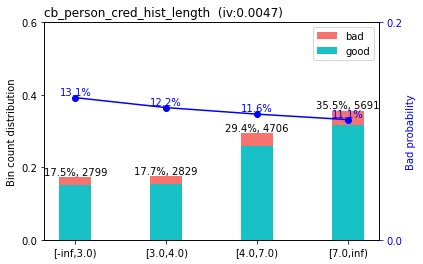

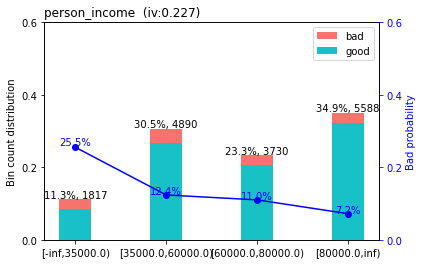

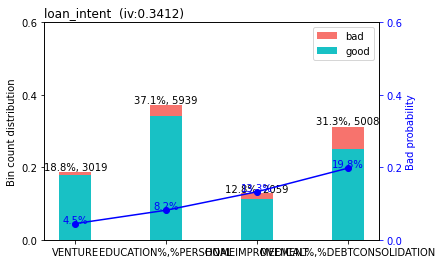

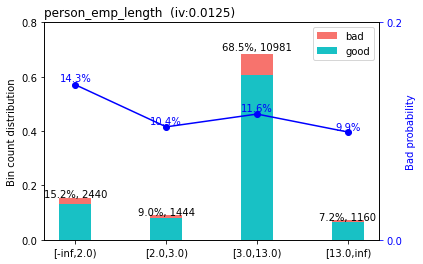

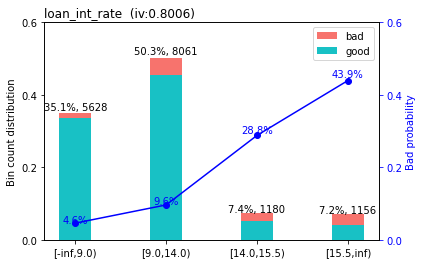

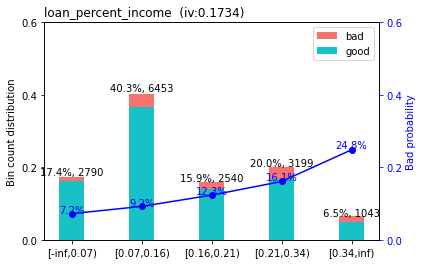

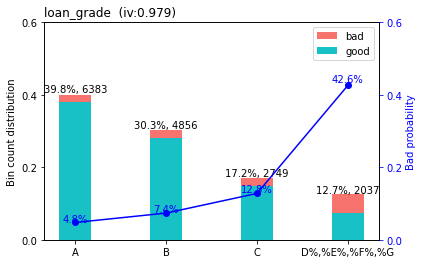

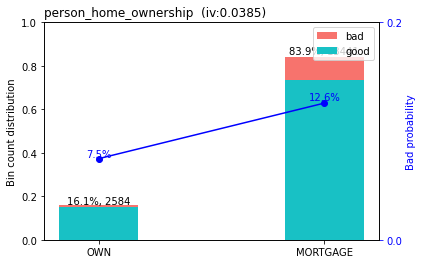

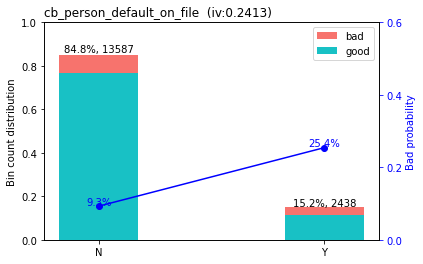

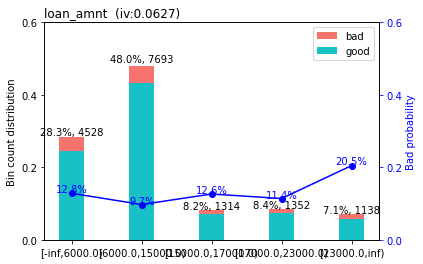

In [27]:
bins2 = sc.woebin(owners, y='loan_status')
sc.woebin_plot(bins2)

In [28]:
for variables , bindetails in bins2.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

cb_person_cred_hist_length  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cb_person_cred_hist_length,"[-inf,3.0)",2799,0.174665,2433,366,0.130761,0.122036,0.002725,0.004748,3.0,False
1,cb_person_cred_hist_length,"[3.0,4.0)",2829,0.176537,2485,344,0.121598,0.038897,0.000271,0.004748,4.0,False
2,cb_person_cred_hist_length,"[4.0,7.0)",4706,0.293666,4162,544,0.115597,-0.018519,0.000100,0.004748,7.0,False
3,cb_person_cred_hist_length,"[7.0,inf)",5691,0.355133,5062,629,0.110525,-0.069103,0.001652,0.004748,inf,False


----------------------------------------------------------------------------------------------------
person_income  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,person_income,"[-inf,35000.0)",1817,0.113385,1353,464,0.255366,0.946088,0.142616,0.227035,35000.0,False
1,person_income,"[35000.0,60000.0)",4890,0.305148,4285,605,0.123722,0.058635,0.001073,0.227035,60000.0,False
2,person_income,"[60000.0,80000.0)",3730,0.232761,3319,411,0.110188,-0.072543,0.001191,0.227035,80000.0,False
3,person_income,"[80000.0,inf)",5588,0.348705,5185,403,0.072119,-0.538306,0.082155,0.227035,inf,False


----------------------------------------------------------------------------------------------------
loan_intent  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_intent,VENTURE,3019,0.188393,2884,135,0.044717,-1.045376,0.138238,0.341241,VENTURE,False
1,loan_intent,"EDUCATION%,%PERSONAL",5939,0.370608,5454,485,0.081664,-0.403673,0.051707,0.341241,"EDUCATION%,%PERSONAL",False
2,loan_intent,HOMEIMPROVEMENT,2059,0.128487,1786,273,0.132589,0.138021,0.002580,0.341241,HOMEIMPROVEMENT,False
3,loan_intent,"MEDICAL%,%DEBTCONSOLIDATION",5008,0.312512,4018,990,0.197684,0.615448,0.148716,0.341241,"MEDICAL%,%DEBTCONSOLIDATION",False


----------------------------------------------------------------------------------------------------
person_emp_length  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,person_emp_length,"[-inf,2.0)",2440,0.152262,2092,348,0.142623,0.222609,0.008211,0.012514,2.0,False
1,person_emp_length,"[2.0,3.0)",1444,0.090109,1294,150,0.103878,-0.138575,0.001641,0.012514,3.0,False
2,person_emp_length,"[3.0,13.0)",10981,0.685242,9711,1270,0.115654,-0.017960,0.000220,0.012514,13.0,False
3,person_emp_length,"[13.0,inf)",1160,0.072387,1045,115,0.099138,-0.190557,0.002443,0.012514,inf,False


----------------------------------------------------------------------------------------------------
loan_int_rate  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_int_rate,"[-inf,9.0)",5628,0.351201,5369,259,0.046020,-1.015286,0.245804,0.800562,9.0,False
1,loan_int_rate,"[9.0,14.0)",8061,0.503027,7285,776,0.096266,-0.223137,0.022988,0.800562,14.0,False
2,loan_int_rate,"[14.0,15.5)",1180,0.073635,840,340,0.288136,1.111827,0.134715,0.800562,15.5,False
3,loan_int_rate,"[15.5,inf)",1156,0.072137,648,508,0.439446,1.772874,0.397055,0.800562,inf,False


----------------------------------------------------------------------------------------------------
loan_percent_income  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_percent_income,"[-inf,0.07)",2790,0.174103,2589,201,0.072043,-0.539439,0.041174,0.173442,0.07,False
1,loan_percent_income,"[0.07,0.16)",6453,0.402683,5858,595,0.092205,-0.270719,0.026596,0.173442,0.16,False
2,loan_percent_income,"[0.16,0.21)",2540,0.158502,2227,313,0.123228,0.054075,0.000473,0.173442,0.21,False
3,loan_percent_income,"[0.21,0.34)",3199,0.199626,2684,515,0.160988,0.365386,0.030587,0.173442,0.34,False
4,loan_percent_income,"[0.34,inf)",1043,0.065086,784,259,0.248322,0.908702,0.074612,0.173442,inf,False


----------------------------------------------------------------------------------------------------
loan_grade  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_grade,A,6383,0.398315,6078,305,0.047783,-0.975836,0.261337,0.979022,A,False
1,loan_grade,B,4856,0.303027,4498,358,0.073723,-0.514572,0.065833,0.979022,B,False
2,loan_grade,C,2749,0.171544,2397,352,0.128047,0.097941,0.001708,0.979022,C,False
3,loan_grade,"D%,%E%,%F%,%G",2037,0.127114,1169,868,0.426117,1.718571,0.650144,0.979022,"D%,%E%,%F%,%G",False


----------------------------------------------------------------------------------------------------
person_home_ownership  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,person_home_ownership,OWN,2584,0.161248,2391,193,0.074690,-0.500494,0.033320,0.038451,OWN,False
1,person_home_ownership,MORTGAGE,13441,0.838752,11751,1690,0.125735,0.077073,0.005131,0.038451,MORTGAGE,False


----------------------------------------------------------------------------------------------------
cb_person_default_on_file  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cb_person_default_on_file,N,13587,0.847863,12324,1263,0.092957,-0.261776,0.052541,0.241309,N,False
1,cb_person_default_on_file,Y,2438,0.152137,1818,620,0.254307,0.940510,0.188768,0.241309,Y,False


----------------------------------------------------------------------------------------------------
loan_amnt  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,loan_amnt,"[-inf,6000.0)",4528,0.282559,3947,581,0.128313,0.100323,0.002955,0.062668,6000.0,False
1,loan_amnt,"[6000.0,15000.0)",7693,0.480062,6944,749,0.097361,-0.210611,0.019640,0.062668,15000.0,False
2,loan_amnt,"[15000.0,17000.0)",1314,0.081997,1148,166,0.126332,0.082494,0.000576,0.062668,17000.0,False
3,loan_amnt,"[17000.0,23000.0)",1352,0.084368,1198,154,0.113905,-0.035173,0.000103,0.062668,23000.0,False
4,loan_amnt,"[23000.0,inf)",1138,0.071014,905,233,0.204745,0.659386,0.039395,0.062668,inf,False


----------------------------------------------------------------------------------------------------


In [29]:
owners.drop(['person_home_ownership', 'cb_person_cred_hist_length', 'person_emp_length'], axis=1, inplace=True)

C:\Users\zweid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='loan_int_rate', ylabel='Density'>

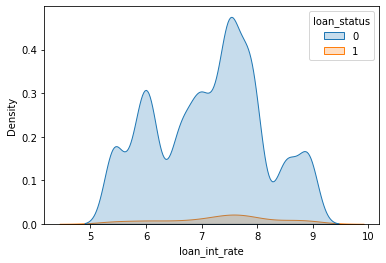

In [30]:
df_filter = owners[(owners['loan_int_rate'] < 9)]
sns.kdeplot(data = df_filter, x="loan_int_rate", hue="loan_status", fill = True)

[INFO] creating woe binning ...


{'person_income': <Figure size 432x288 with 2 Axes>,
 'loan_intent': <Figure size 432x288 with 2 Axes>,
 'loan_int_rate': <Figure size 432x288 with 2 Axes>,
 'loan_percent_income': <Figure size 432x288 with 2 Axes>,
 'loan_grade': <Figure size 432x288 with 2 Axes>,
 'cb_person_default_on_file': <Figure size 432x288 with 2 Axes>,
 'loan_amnt': <Figure size 432x288 with 2 Axes>}

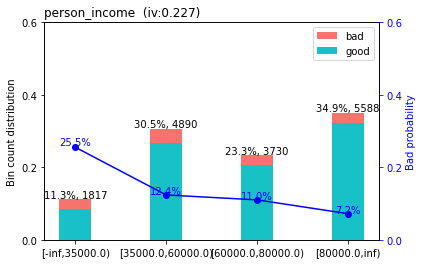

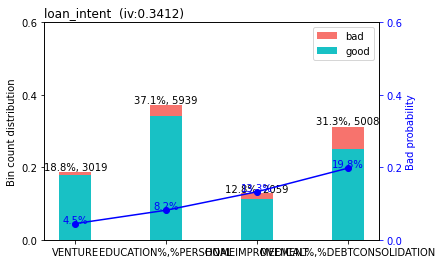

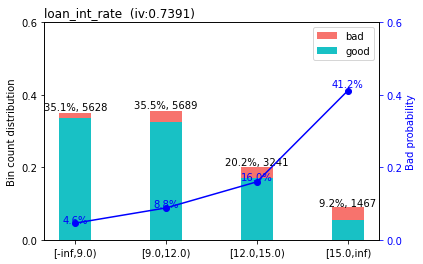

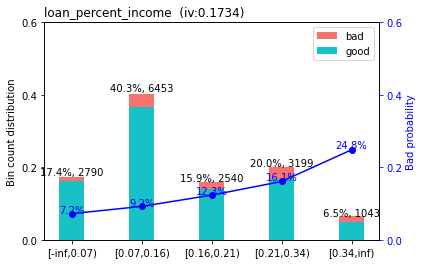

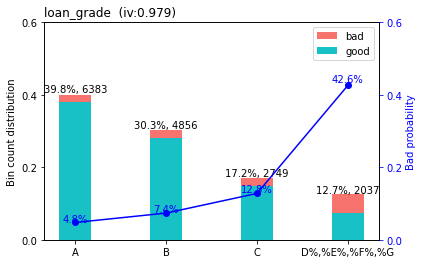

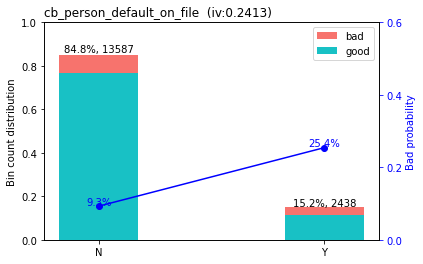

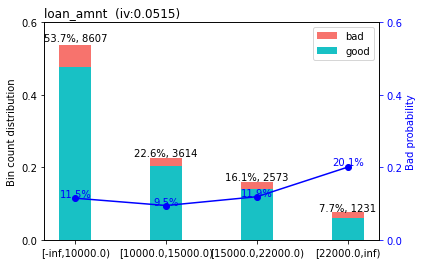

In [31]:
breaks_adj = {'loan_int_rate' : [9,12,15], 'loan_amnt' : [10000,15000,22000]}
bins2 = sc.woebin(owners, y='loan_status',breaks_list=breaks_adj)
sc.woebin_plot(bins2)

In [32]:
train2, test2 = sc.split_df(owners, 'loan_status', ratio=0.7).values()
train_woe2 = sc.woebin_ply(train2, bins2)
test_woe2 = sc.woebin_ply(test2, bins2)
y_train2 = train_woe2.loc[:,'loan_status']
X_train2 = train_woe2.loc[:,train_woe2.columns != 'loan_status']
y_test2 = test_woe2.loc[:,'loan_status']
X_test2 = test_woe2.loc[:,train_woe2.columns != 'loan_status']
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)
card2 = sc.scorecard(bins2, lr2, X_train2.columns)
train_score2 = sc.scorecard_ply(train2, card2)
test_score2 = sc.scorecard_ply(test2, card2)
pprint.pprint(card2)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
{'basepoints':      variable  bin  points
0  basepoints  NaN   533.0,
 'cb_person_default_on_file':                      variable bin  points
21  cb_person_default_on_file   N     1.0
22  cb_person_default_on_file   Y    -3.0,
 'loan_amnt':      variable                bin  points
23  loan_amnt     [-inf,10000.0)     1.0
24  loan_amnt  [10000.0,15000.0)     9.0
25  loan_amnt  [15000.0,22000.0)    -1.0
26  loan_amnt      [22000.0,inf)   -23.0,
 'loan_grade':       variable            bin  points
17  loan_grade              A    67.0
18  loan_grade              B    35.0
19  loan_grade              C    -7.0
20  loan_grade  D%,%E%,%F%,%G  -118.0,
 'loan_int_rate':          variable          bin  points
8   loan_int_rate   [-inf,9.0)     9.0
9   loan_int_rate   [9.0,12.0)     3.0
10  loan_int_rate  [12.0,15.0)    -3.0
11  loan_int_rate   [15.0,inf)   -15.0,
 'loan_intent':       variable                          b

In [33]:
y_pred2 = lr2.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2) # lower rmse indicates better fit -> more accurately predicts response
r2_2 = r2_score(y_test2, y_pred2) # higher r2 indicates better fit (proportion of variance explained by model)
print(rmse2, r2_2)

0.3021690857880568 0.11954431974371127


C:\Users\zweid\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\zweid\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


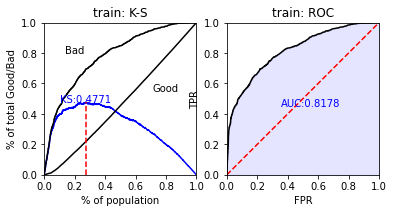

C:\Users\zweid\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\zweid\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


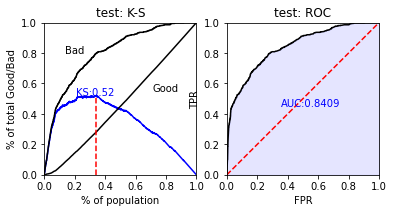

In [34]:
# Evaluate the performance of the Logistic Regression
train_pred2 = lr2.predict_proba(X_train2)[:,1]
test_pred2 = lr2.predict_proba(X_test2)[:,1]

# performance ks & roc
train_perf2 = sc.perf_eva(y_train2, train_pred2, title = "train")
test_perf2 = sc.perf_eva(y_test2, test_pred2, title = "test")

In [35]:
print(classification_report(y_pred2, y_test2))
print(confusion_matrix(y_pred2, y_test2))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4572
           1       0.32      0.77      0.45       236

    accuracy                           0.91      4808
   macro avg       0.65      0.84      0.70      4808
weighted avg       0.95      0.91      0.93      4808

[[4188  384]
 [  55  181]]


In [36]:
card2 = sc.scorecard(bins2, lr2, X_train2.columns, basepoints_eq0= 0, points0 = 600, odds0 = 1/50 , pdo = 20 )
pprint.pprint(card2)

{'basepoints':      variable  bin  points
0  basepoints  NaN   545.0,
 'cb_person_default_on_file':                      variable bin  points
21  cb_person_default_on_file   N     0.0
22  cb_person_default_on_file   Y    -1.0,
 'loan_amnt':      variable                bin  points
23  loan_amnt     [-inf,10000.0)     0.0
24  loan_amnt  [10000.0,15000.0)     4.0
25  loan_amnt  [15000.0,22000.0)    -0.0
26  loan_amnt      [22000.0,inf)    -9.0,
 'loan_grade':       variable            bin  points
17  loan_grade              A    27.0
18  loan_grade              B    14.0
19  loan_grade              C    -3.0
20  loan_grade  D%,%E%,%F%,%G   -47.0,
 'loan_int_rate':          variable          bin  points
8   loan_int_rate   [-inf,9.0)     4.0
9   loan_int_rate   [9.0,12.0)     1.0
10  loan_int_rate  [12.0,15.0)    -1.0
11  loan_int_rate   [15.0,inf)    -6.0,
 'loan_intent':       variable                          bin  points
4  loan_intent                      VENTURE    32.0
5  loan_inten